In [54]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score,precision_score,recall_score,accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [55]:
df = pd.read_csv("Housing.csv")
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [56]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [57]:
df.shape

(545, 13)

In [58]:
threshold = 200000  # Adjust this threshold as needed

In [59]:
df["mainroad"] = df["mainroad"].astype('category')

In [60]:
df['main_new'] = df['mainroad'].cat.codes

In [61]:
enc = OneHotEncoder()

In [62]:
enc_df = pd.DataFrame(enc.fit_transform(
    df[['main_new']]).toarray())

In [63]:
New_df = df.join(enc_df)

print(New_df)

        price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0    13300000  7420         4          2        3      yes        no       no   
1    12250000  8960         4          4        4      yes        no       no   
2    12250000  9960         3          2        2      yes        no      yes   
3    12215000  7500         4          2        2      yes        no      yes   
4    11410000  7420         4          1        2      yes       yes      yes   
..        ...   ...       ...        ...      ...      ...       ...      ...   
540   1820000  3000         2          1        1      yes        no      yes   
541   1767150  2400         3          1        1       no        no       no   
542   1750000  3620         2          1        1      yes        no       no   
543   1750000  2910         3          1        1       no        no       no   
544   1750000  3850         3          1        2      yes        no       no   

    hotwaterheating aircond

In [64]:
New_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   price             545 non-null    int64   
 1   area              545 non-null    int64   
 2   bedrooms          545 non-null    int64   
 3   bathrooms         545 non-null    int64   
 4   stories           545 non-null    int64   
 5   mainroad          545 non-null    category
 6   guestroom         545 non-null    object  
 7   basement          545 non-null    object  
 8   hotwaterheating   545 non-null    object  
 9   airconditioning   545 non-null    object  
 10  parking           545 non-null    int64   
 11  prefarea          545 non-null    object  
 12  furnishingstatus  545 non-null    object  
 13  main_new          545 non-null    int8    
 14  0                 545 non-null    float64 
 15  1                 545 non-null    float64 
dtypes: category(1), float64(2)

In [65]:
x = New_df[['area','bedrooms','bathrooms','main_new']]
y = New_df[['price']]

In [66]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [67]:
reg = LogisticRegression().fit(x_train.values,y_train.values)
reg

c:\Users\shrut\OneDrive\Desktop\Home_price_pred\my_env\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\shrut\OneDrive\Desktop\Home_price_pred\my_env\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [68]:
pre = reg.predict(x_test.values)

In [69]:
x_train.values

array([[3620,    2,    1,    1],
       [4000,    2,    1,    1],
       [3040,    2,    1,    0],
       ...,
       [5750,    3,    2,    1],
       [3600,    3,    1,    1],
       [6600,    3,    1,    1]])

In [70]:
compare = pd.DataFrame({"Actual":y_test.to_numpy().flatten(),"predicted":pre.flatten()})
compare

,Actual,predicted
0,4585000,3500000
1,6083000,3500000
2,4007500,4200000
3,6930000,4760000
4,2940000,4200000
...,...,...
104,6650000,3500000
105,5810000,3500000
106,4123000,3500000
107,3080000,3500000


In [71]:
confusion = confusion_matrix(y_test, pre)
accuracy = accuracy_score(y_test, pre)
precision = precision_score(y_test, pre, average='macro')
recall = recall_score(y_test, pre, average='macro')
f1 = f1_score(y_test, pre, average='macro')




c:\Users\shrut\OneDrive\Desktop\Home_price_pred\my_env\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\shrut\OneDrive\Desktop\Home_price_pred\my_env\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [72]:
print("Confusion matrix is::")
print(confusion)
print("Accuracy::",accuracy)
print("Precision::",precision)
print("Recall::",recall)

Confusion matrix is::
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Accuracy:: 0.01834862385321101
Precision:: 0.000390625
Recall:: 0.005


In [73]:
area = int(input("Enter the Area::"))
bedroom = int(input("Enter the how many bedrooms are in the house::"))
bathroom = int(input("Enter the how many bathrooms are in the house::"))
mainroad = int(input("Enter 1 if house on the Main Road or 0 if not::"))
inputs = [area,bedroom,bathroom,mainroad]
price_predicted = reg.predict([inputs])
print("Predicted Price of a house is::",price_predicted)


Predicted Price of a house is:: [3500000]


In [74]:
if price_predicted > threshold:
  print("Highly preferred")
else:
  print("you may preferred")

Highly preferred


In [75]:
import matplotlib.pyplot as plt

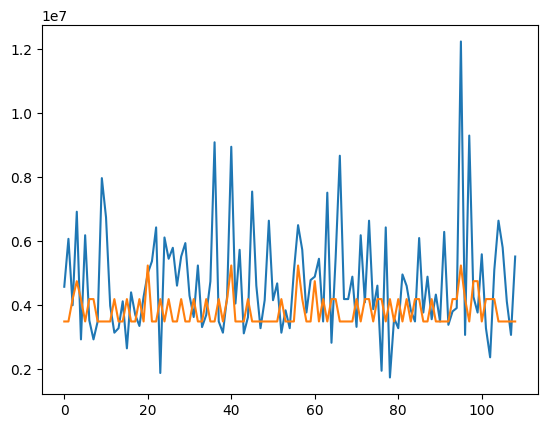

In [76]:
graph = plt.plot(compare)
graph

In [77]:
import pickle
pickle.dump(reg,open('house_price_model.pkl','wb'))

In [78]:
model = pickle.load(open('house_price_model.pkl','rb'))